In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import GridSearchCV

import seaborn as sns

import missingno as msno 

dashes = dashes='---'*20

import warnings
warnings.filterwarnings("ignore")

### Introduction
According to the World Health Organization, one out of six people in Tanzania lack access to safe drinking water. Women and children must walk long distances to find water.  In rural Tanzania people walk for 2 to 3 km daily in search of water from public taps where available or natural streams.  They must carrying heavy containers for the water on their heads of about 20 to 25 litres per trip.  When they find water there is a problem of long lines at the point of water tap or boreholes where people spend hours to wait for their turn.  The water shortage has been caused by population growth, high level consumption and climate change which has reduced the resources of water.  Water shortages lead to poor sanitation, lack of safe drinking water, and overcrowding at water sources. projectzawadi.org.

The Tanzanian Ministry of Water is seeking to solve the ongoing water crisis in Tanzania by increasing the number of functioning water wells.  It is crucial to the health and safety of communities that its residents have access to drinking water.  Tanzania has a lot of water wells that are non-functioning or in need of repair.  Predictive modeling can be used to aid in solving this problem. <br> 
<BR>
My objective is to build classification models that will predict the operating status of water wells based on features in the dataset.  The data was gathered by Taarifa from the Tanzanian Ministry of Water and consists of over 59,400 data points of water well pumps in Tanzania and 40 features. The data consists of features regarding the pumps, such as installer, install date, location and pump type, etc.  The data also includes a target variable indicating the status of the functionality of the pumps.  The functioning status of the wells are identifed as  functioning, non-functioning or functioning but in need of repairs.  
<BR>
In addition, I will provide an analysis and visualizations of the data to provide insights and information on  the relationship between the features and the operating status of water wells, e.g., does location of the wells impact the liklihood the wells will be functioning or non-functioning.  

## The Data

In [2]:
pd.set_option('display.max_columns', None)  
df_1 = pd.read_csv('data/water_table.csv')
labels = pd.read_csv('data/water_table_labels.csv')
df_1['target'] = labels['status_group']

In [3]:
df_1['target'] = df_1['target'].map({'functional':0,'non functional':1,'functional needs repair':2})
df_1.drop('id',axis=1, inplace=True)

In [4]:
df_1.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0


In [5]:
df_1['construction_year'].describe()

count    59400.000000
mean      1300.652475
std        951.620547
min          0.000000
25%          0.000000
50%       1986.000000
75%       2004.000000
max       2013.000000
Name: construction_year, dtype: float64

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15  wa

## Data Cleaning

The following are issues with the data that need to be addressed.  These issues will be addressed by issue and feature.<br>
There are several features that have Null values.  I will impute the NaN values with median values of the feature when the datatypes are numeric and rename the values when the values are objects.<br>
There are several features with object datatypes that have 0 as a category.  This category will need to be renamed or dropped depending on their percentage of the feature.<br> 
There are features that are duplicates or variations of other features in the dataset.  The duplicate features will not be included in the dataset.<br>
There are several features that have object values and numerous unique categories.  The features will need to be One-Hot encoded for modeling purposes.  The features with too many unique values the lower count categories will be grouped into a category.<br>
I will explain under each feature section which issue is being addressed.

### Null Values
The features funder, installer, subvillage, public meeting, scheme_management, scheme_name, permit are object or boolean datatypes and have NaN values.  I renamed the categories with the NaN values.  I used the mode method to fill in the missing boolean values.<br>
Subvillage won't be included in the dataset because it's a duplicate of region_code which is also defined as geographic location of the wells but coded.

In [7]:
df_1.isna().sum()

amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity

In [8]:
def count_value_status(data, feature):
    #function provides count and percentage of each value
    vc= df_2[feature]
    count = vc.value_counts(dropna=False)
    percent = vc.value_counts(normalize=True)
    percent100 = vc.value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    count_df = pd.DataFrame({'count': count, 'per': percent,'%': percent100})
    return count_df 

In [9]:
df_2 = df_1.copy()

#### amount_tsh
This feature is defined as the total static head or the amount of water avaliable to waterpoint. According to below, 70% of the values in this feature are 0.  This is too big of a percentage to do any imputing of the values.  I dropped this feature from the dataset.

In [10]:
count_value_status(df_2, 'amount_tsh')

,count,per,%
0.0,41639,0.700993,70.1%
500.0,3102,0.052222,5.22%
50.0,2472,0.041616,4.16%
1000.0,1488,0.025051,2.51%
20.0,1463,0.024630,2.46%
...,...,...,...
8500.0,1,0.000017,0.0%
6300.0,1,0.000017,0.0%
220.0,1,0.000017,0.0%
138000.0,1,0.000017,0.0%


#### funder
Funder is defined as who funded the well.  This feature has 3635 NaN values.  There is a value of 'O' so we can group all NaN value with those of 'O'.  In addition, the feature values are objects and there are 1,897 unique values.  The unique values will be need to be One-Hot Encoded for modeling purposes.  I grouped all unique values with a count of 100 or less and put them in a categery entitled 'Unknown'. 

In [11]:
count_value_status(df_2, 'funder')

,count,per,%
Government Of Tanzania,9084,0.162898,16.29%
NaN,3635,NaN,NaN
Danida,3114,0.055841,5.58%
Hesawa,2202,0.039487,3.95%
Rwssp,1374,0.024639,2.46%
...,...,...,...
Kagera Mine,1,0.000018,0.0%
Dasiip,1,0.000018,0.0%
Wug And Ded,1,0.000018,0.0%
Omar Rafael,1,0.000018,0.0%


In [12]:
df_2['funder'] = df_2['funder'].replace(np.nan, '0')

In [13]:
print(f"The number of unique categories in the feature funder are: {len(df_2['funder'].unique())}") 

The number of unique categories in the feature funder are: 1897


In [14]:
df_2 = df_2.apply(lambda x: x.mask(x.map(x.value_counts())< 100, 'other') if x.name=='funder' else x)

In [15]:
#pd.set_option('display.max_rows', None)
df_2['funder'].value_counts(dropna=False)

other                            12379
Government Of Tanzania            9084
0                                 4412
Danida                            3114
Hesawa                            2202
                                 ...  
Village Council                    105
Ru                                 105
Halmashauri Ya Wilaya Sikonge      102
Germany                            101
Hsw                                101
Name: funder, Length: 92, dtype: int64

In [16]:
len(df_2['funder'].unique())

92

#### gps_height 
The feature is defined as the altitude of the well.  This feature has a value of 0 which is 34.4% of the feature.  I imputed the 0 value with the median values of the feature.  

In [17]:
count_value_status(df_2, 'gps_height') 

,count,per,%
0,20438,0.344074,34.41%
-15,60,0.001010,0.1%
-16,55,0.000926,0.09%
-13,55,0.000926,0.09%
-20,52,0.000875,0.09%
...,...,...,...
2285,1,0.000017,0.0%
2424,1,0.000017,0.0%
2552,1,0.000017,0.0%
2413,1,0.000017,0.0%


In [18]:
mean = df_2['gps_height'][df_2['gps_height'] != 0].mean()
df_2['gps_height'].replace(0, mean, inplace=True)

In [19]:
count_value_status(df_2, 'gps_height') 

,count,per,%
1018.860839,20438,0.344074,34.41%
-15.000000,60,0.001010,0.1%
-13.000000,55,0.000926,0.09%
-16.000000,55,0.000926,0.09%
1290.000000,52,0.000875,0.09%
...,...,...,...
2285.000000,1,0.000017,0.0%
649.000000,1,0.000017,0.0%
2312.000000,1,0.000017,0.0%
2257.000000,1,0.000017,0.0%


#### installer
This feature is defined as the organization that installed the well.  Feature has 3655 NaN values.  The feature is an object so I didn't impute median values.  I changed the value of NaN to 'Unknown'.  There are 2145 unique values and alot have small counts so any value with a count of 100 or less I grouped into a category called 'Other'.  

In [20]:
count_value_status(df_2, 'installer')

,count,per,%
DWE,17402,0.312171,31.22%
NaN,3655,NaN,NaN
Government,1825,0.032738,3.27%
RWE,1206,0.021634,2.16%
Commu,1060,0.019015,1.9%
...,...,...,...
Dar es salaam Technician,1,0.000018,0.0%
DWE & LWI,1,0.000018,0.0%
Kwamdulu estate,1,0.000018,0.0%
Al Ha,1,0.000018,0.0%


In [21]:
df_2['installer'] = np.where(df_2['installer'].isnull(),"Unknown",df_2['installer'])

In [22]:
count_value_status(df_2, 'installer')

,count,per,%
DWE,17402,0.292963,29.3%
Unknown,3658,0.061582,6.16%
Government,1825,0.030724,3.07%
RWE,1206,0.020303,2.03%
Commu,1060,0.017845,1.78%
...,...,...,...
Hesewa,1,0.000017,0.0%
Benjamin,1,0.000017,0.0%
Mzungu,1,0.000017,0.0%
Muhindi,1,0.000017,0.0%


In [23]:
len(df_2['installer'].unique())

2145

In [24]:
df_2 = df_2.apply(lambda x: x.mask(x.map(x.value_counts())< 100, 'Other') if x.name=='installer' else x)

In [25]:
count_value_status(df_2, 'installer')

,count,per,%
DWE,17402,0.292963,29.3%
Other,13542,0.227980,22.8%
Unknown,3658,0.061582,6.16%
Government,1825,0.030724,3.07%
RWE,1206,0.020303,2.03%
...,...,...,...
FINI WATER,103,0.001734,0.17%
WATER AID,103,0.001734,0.17%
Halmashauri ya wilaya sikonge,102,0.001717,0.17%
Wizara ya maji,100,0.001684,0.17%


In [26]:
#df_2.groupby(['funder', 'installer']).size()

#### Longitude
This feature is defined as the GPS coordinate.  3.05% of this feature has a value of 0.  I imputed the 0 value with the mean value of the feature.

In [27]:
count_value_status(df_2, 'longitude') 

,count,per,%
0.000000,1812,0.030505,3.05%
37.540901,2,0.000034,0.0%
33.010510,2,0.000034,0.0%
39.093484,2,0.000034,0.0%
32.972719,2,0.000034,0.0%
...,...,...,...
37.579803,1,0.000017,0.0%
33.196490,1,0.000017,0.0%
34.017119,1,0.000017,0.0%
33.788326,1,0.000017,0.0%


In [28]:
longitude_mean = df_2[df_2['longitude']>0]['longitude'].mean()
df_2.loc[df_2['longitude']==0.00, 'longitude'] = float(longitude_mean)

In [29]:
df_2['longitude'].value_counts(normalize=True)

35.149669    0.030505
33.090347    0.000034
39.086287    0.000034
39.098514    0.000034
38.180538    0.000034
               ...   
37.579803    0.000017
33.196490    0.000017
34.017119    0.000017
33.788326    0.000017
35.005922    0.000017
Name: longitude, Length: 57516, dtype: float64

#### Latitude
This feature is defined as the GPS coordinate.  Feature has a value of 0 and was creating problems when trying to create a plot.  I imputed the 0 value with the mean value of the feature.

In [30]:
count_value_status(df_2, 'latitude') 

,count,per,%
-2.000000e-08,1812,0.030505,3.05%
-6.985842e+00,2,0.000034,0.0%
-3.797579e+00,2,0.000034,0.0%
-6.981884e+00,2,0.000034,0.0%
-7.104625e+00,2,0.000034,0.0%
...,...,...,...
-5.726001e+00,1,0.000017,0.0%
-9.646831e+00,1,0.000017,0.0%
-8.124530e+00,1,0.000017,0.0%
-2.535985e+00,1,0.000017,0.0%


In [31]:
latitude_mean = df_2[df_2['latitude']>0]['latitude'].mean()
df_2.loc[df_2['latitude']==0, 'latitude'] = float(latitude_mean)

#### wpt_name and num_private
wpt_name is defined as the name of the well.  This feature is an object and has 37,400 unique values.  This is too many to One_Hot Encode for modeling purposes and will not be included in the dataset.  Also, not sure the name of the well is helpful for prediction purposes since we already features for region_code, installer and ward. <br>

For num_private, 98.7% of the feature has a value of 0.  This is too many values to impute and will not be included in the dataset.  

In [32]:
count_value_status(df_2, 'wpt_name') 

,count,per,%
none,3563,0.059983,6.0%
Shuleni,1748,0.029428,2.94%
Zahanati,830,0.013973,1.4%
Msikitini,535,0.009007,0.9%
Kanisani,323,0.005438,0.54%
...,...,...,...
Kwa Bochela,1,0.000017,0.0%
Chakumbagaire,1,0.000017,0.0%
Rushanju A,1,0.000017,0.0%
Kwa Nguyeti Kilembwe,1,0.000017,0.0%


In [33]:
df_2['wpt_name'].nunique()

37400

In [34]:
df_2['wpt_name'] = df_2['wpt_name'].replace('none', 'Unknown')

In [35]:
df_2 = df_2.apply(lambda x: x.mask(x.map(x.value_counts())< 100, 'Other') if x.name=='wpt_name' else x)

In [36]:
count_value_status(df_2, 'wpt_name') 

,count,per,%
Other,50560,0.851178,85.12%
Unknown,3566,0.060034,6.0%
Shuleni,1748,0.029428,2.94%
Zahanati,830,0.013973,1.4%
Msikitini,535,0.009007,0.9%
Kanisani,323,0.005438,0.54%
Bombani,271,0.004562,0.46%
Sokoni,260,0.004377,0.44%
Ofisini,254,0.004276,0.43%
School,208,0.003502,0.35%


In [37]:
count_value_status(df_2, 'num_private') 

,count,per,%
0,58643,0.987256,98.73%
6,81,0.001364,0.14%
1,73,0.001229,0.12%
5,46,0.000774,0.08%
8,46,0.000774,0.08%
...,...,...,...
180,1,0.000017,0.0%
213,1,0.000017,0.0%
23,1,0.000017,0.0%
55,1,0.000017,0.0%


#### basin
This is feature is defined as the geographic water basin.

In [38]:
count_value_status(df_2, 'basin') 

,count,per,%
Lake Victoria,10248,0.172525,17.25%
Pangani,8940,0.150505,15.05%
Rufiji,7976,0.134276,13.43%
Internal,7785,0.131061,13.11%
Lake Tanganyika,6432,0.108283,10.83%
Wami / Ruvu,5987,0.100791,10.08%
Lake Nyasa,5085,0.085606,8.56%
Ruvuma / Southern Coast,4493,0.075640,7.56%
Lake Rukwa,2454,0.041313,4.13%


#### region_code and district_code
Both features are defined as the coded geographic location of the well.  It appears that each region has several districts.  Not sure having both is necessary. I dropped  district_code from the dataset. 

In [39]:
count_value_status(df_2, 'region_code') 

,count,per,%
11,5300,0.089226,8.92%
17,5011,0.084360,8.44%
12,4639,0.078098,7.81%
3,4379,0.073721,7.37%
5,4040,0.068013,6.8%
18,3324,0.055960,5.6%
19,3047,0.051296,5.13%
2,3024,0.050909,5.09%
16,2816,0.047407,4.74%
10,2640,0.044444,4.44%


In [40]:
count_value_status(df_2, 'district_code') 

,count,per,%
1,12203,0.205438,20.54%
2,11173,0.188098,18.81%
3,9998,0.168316,16.83%
4,8999,0.151498,15.15%
5,4356,0.073333,7.33%
6,4074,0.068586,6.86%
7,3343,0.056279,5.63%
8,1043,0.017559,1.76%
30,995,0.016751,1.68%
33,874,0.014714,1.47%


In [130]:
df_2.groupby(['region_code', 'district_code']).size()

region_code  district_code
1            0                 23
             1                888
             3                361
             4                347
             5                358
                             ... 
80           53               291
             62               109
90           33               759
             63               158
99           1                423
Length: 130, dtype: int64

#### LGA and Ward
These features are both defined as the geographic location of the wells.  Feature ward is more extensive than lga in noting location but ward should be enough.  LGA  has 125 unique value and ward has 2092 unique values.  Feature ward is dropped from the dataset. 

In [42]:
count_value_status(df_2, 'lga') 

,count,per,%
Njombe,2503,0.042138,4.21%
Arusha Rural,1252,0.021077,2.11%
Moshi Rural,1251,0.021061,2.11%
Bariadi,1177,0.019815,1.98%
Rungwe,1106,0.018620,1.86%
...,...,...,...
Moshi Urban,79,0.001330,0.13%
Kigoma Urban,71,0.001195,0.12%
Arusha Urban,63,0.001061,0.11%
Lindi Urban,21,0.000354,0.04%


In [43]:
len(count_value_status(df_2, 'ward')) 

2092

In [44]:
df_2 = df_2.apply(lambda x: x.mask(x.map(x.value_counts())< 100, 'Other') if x.name=='lga' else x)

In [45]:
count_value_status(df_2, 'lga') 

,count,per,%
Njombe,2503,0.042138,4.21%
Arusha Rural,1252,0.021077,2.11%
Moshi Rural,1251,0.021061,2.11%
Bariadi,1177,0.019815,1.98%
Rungwe,1106,0.018620,1.86%
...,...,...,...
Tabora Urban,155,0.002609,0.26%
Liwale,154,0.002593,0.26%
Ilemela,142,0.002391,0.24%
Mafia,132,0.002222,0.22%


#### Population
Population is defined as the population around the well.  36% of water wells have 0 population around them.  I don't have access to data to confirm whether this is correct so I imputed the 0 values with the mean values of the feature.

In [46]:
count_value_status(df_2, 'population') 

,count,per,%
0,21381,0.359949,35.99%
1,7025,0.118266,11.83%
200,1940,0.032660,3.27%
150,1892,0.031852,3.19%
250,1681,0.028300,2.83%
...,...,...,...
3241,1,0.000017,0.0%
1960,1,0.000017,0.0%
1685,1,0.000017,0.0%
2248,1,0.000017,0.0%


In [47]:
population_mean = df_2[df_2['population']>0]['population'].mean()
df_2.loc[df_2['population']==0, 'population'] = int(population_mean)

In [48]:
count_value_status(df_2, 'population') 

,count,per,%
281,21385,0.360017,36.0%
1,7025,0.118266,11.83%
200,1940,0.032660,3.27%
150,1892,0.031852,3.19%
250,1681,0.028300,2.83%
...,...,...,...
406,1,0.000017,0.0%
1960,1,0.000017,0.0%
1685,1,0.000017,0.0%
2248,1,0.000017,0.0%


#### public_meeting
This feature has 3334 NaN values.  It is a boolean datatype so I used mode function to fill the NaN values.

In [49]:
count_value_status(df_2, 'public_meeting') 

,count,per,%
False,5055,0.090162,9.02%
True,51011,0.909838,90.98%
NaN,3334,NaN,NaN


In [50]:
m=df_2["public_meeting"].mode()[0]
df_2["public_meeting"].fillna(m,inplace=True)

In [51]:
df_2['public_meeting'] = list(map(int, df_2['public_meeting']))

In [52]:
count_value_status(df_2, 'public_meeting') 

,count,per,%
1,54345,0.914899,91.49%
0,5055,0.085101,8.51%


#### scheme_management and scheme_name
scheme_management and scheme_name are both defined as who operates the waterpoint.  They are duplicates.  I dropped scheme_name from the dataset.  


In [53]:
count_value_status(df_2, 'scheme_management') 

,count,per,%
VWC,36793,0.662662,66.27%
WUG,5206,0.093763,9.38%
NaN,3877,NaN,NaN
Water authority,3153,0.056787,5.68%
WUA,2883,0.051924,5.19%
Water Board,2748,0.049493,4.95%
Parastatal,1680,0.030258,3.03%
Private operator,1063,0.019145,1.91%
Company,1061,0.019109,1.91%
Other,766,0.013796,1.38%


In [54]:
df_2['scheme_management'] = np.where(df_2['scheme_management'].isnull(),"Unknown",df_2['scheme_management'])

In [55]:
count_value_status(df_2, 'scheme_management') 

,count,per,%
VWC,36793,0.619411,61.94%
WUG,5206,0.087643,8.76%
Unknown,3877,0.065269,6.53%
Water authority,3153,0.053081,5.31%
WUA,2883,0.048535,4.85%
Water Board,2748,0.046263,4.63%
Parastatal,1680,0.028283,2.83%
Private operator,1063,0.017896,1.79%
Company,1061,0.017862,1.79%
Other,766,0.012896,1.29%


#### permit
Permit is defined as whether the well is permitted or not.
There are 3056 NaN values.  I used the mode function to fill in the NaN values. 

In [56]:
count_value_status(df_2, 'permit') 

,count,per,%
False,17492,0.31045,31.05%
True,38852,0.68955,68.95%
NaN,3056,NaN,NaN


In [57]:
m=df_2["permit"].mode()[0]
df_2["permit"].fillna(m,inplace=True)

In [58]:
count_value_status(df_2, 'permit') 

,count,per,%
True,41908,0.705522,70.55%
False,17492,0.294478,29.45%


In [59]:
df_2['permit'] = list(map(int, df_2['permit']))

In [60]:
count_value_status(df_2, 'permit') 

,count,per,%
1,41908,0.705522,70.55%
0,17492,0.294478,29.45%


#### construction_year
The feature construction_year is defined as the year the waterpoint was constructed.  Unfortnately, 34% of the feature is categorized as 0.  I imputed the 0 values from the construction year column with the mean values of the feature. With the cleaned construction year feature I will use feature engineering to create a well age and an average popultion served per year feature.

In [61]:
count_value_status(df_2, 'construction_year') 

,count,per,%
0,20709,0.348636,34.86%
2010,2645,0.044529,4.45%
2008,2613,0.043990,4.4%
2009,2533,0.042643,4.26%
2000,2091,0.035202,3.52%
2007,1587,0.026717,2.67%
2006,1471,0.024764,2.48%
2003,1286,0.021650,2.16%
2011,1256,0.021145,2.11%
2004,1123,0.018906,1.89%


In [62]:
mean = df_2['construction_year'][df_2['construction_year'] != 0].mean()
df_2.construction_year.replace(0, mean, inplace=True)

In [63]:
count_value_status(df_2, 'construction_year') 

,count,per,%
1996.814686,20709,0.348636,34.86%
2010.000000,2645,0.044529,4.45%
2008.000000,2613,0.043990,4.4%
2009.000000,2533,0.042643,4.26%
2000.000000,2091,0.035202,3.52%
2007.000000,1587,0.026717,2.67%
2006.000000,1471,0.024764,2.48%
2003.000000,1286,0.021650,2.16%
2011.000000,1256,0.021145,2.11%
2004.000000,1123,0.018906,1.89%


#### extraction_type_class
The features extraction_type, extraction_type_group, extraction_type_class are defined as the kind of extraction the waterpoint uses.  They are duplicates.  I only included extraction_type_class in the dataset.

In [64]:
count_value_status(df_2, 'extraction_type_class') 

,count,per,%
gravity,26780,0.450842,45.08%
handpump,16456,0.277037,27.7%
other,6430,0.108249,10.82%
submersible,6179,0.104024,10.4%
motorpump,2987,0.050286,5.03%
rope pump,451,0.007593,0.76%
wind-powered,117,0.001970,0.2%


In [131]:
df_2.groupby(['extraction_type', 'extraction_type_group','extraction_type_class']).size()

extraction_type            extraction_type_group  extraction_type_class
afridev                    afridev                handpump                  1770
cemo                       other motorpump        motorpump                   90
climax                     other motorpump        motorpump                   32
gravity                    gravity                gravity                  26780
india mark ii              india mark ii          handpump                  2400
india mark iii             india mark iii         handpump                    98
ksb                        submersible            submersible               1415
mono                       mono                   motorpump                 2865
nira/tanira                nira/tanira            handpump                  8154
other                      other                  other                     6430
other - mkulima/shinyanga  other handpump         handpump                     2
other - play pump          other hand

#### management
Both management and management_group are defined as how the waterpoints are managed.  I only included management in the dataset.

In [65]:
count_value_status(df_2, 'management') 

,count,per,%
vwc,40507,0.681936,68.19%
wug,6515,0.109680,10.97%
water board,2933,0.049377,4.94%
wua,2535,0.042677,4.27%
private operator,1971,0.033182,3.32%
parastatal,1768,0.029764,2.98%
water authority,904,0.015219,1.52%
other,844,0.014209,1.42%
company,685,0.011532,1.15%
unknown,561,0.009444,0.94%


In [66]:
df_2.groupby(['management', 'management_group']).size()

management        management_group
company           commercial            685
other             other                 844
other - school    other                  99
parastatal        parastatal           1768
private operator  commercial           1971
trust             commercial             78
unknown           unknown               561
vwc               user-group          40507
water authority   commercial            904
water board       user-group           2933
wua               user-group           2535
wug               user-group           6515
dtype: int64

#### payment
The features payment and payment_type are defined as what the water costs.  I only included payment in the dataset. 

In [67]:
count_value_status(df_2, 'payment') 

,count,per,%
never pay,25348,0.426734,42.67%
pay per bucket,8985,0.151263,15.13%
pay monthly,8300,0.139731,13.97%
unknown,8157,0.137323,13.73%
pay when scheme fails,3914,0.065892,6.59%
pay annually,3642,0.061313,6.13%
other,1054,0.017744,1.77%


#### quality_group
Both water_quality and quality_group are defined as the quality of the water.  They are duplicates.  I only included quality_group in the dataset.

In [68]:
count_value_status(df_2, 'quality_group') 

,count,per,%
good,50818,0.855522,85.55%
salty,5195,0.087458,8.75%
unknown,1876,0.031582,3.16%
milky,804,0.013535,1.35%
colored,490,0.008249,0.82%
fluoride,217,0.003653,0.37%


In [132]:
df_2.groupby(['water_quality', 'quality_group']).size()

water_quality       quality_group
coloured            colored            490
fluoride            fluoride           200
fluoride abandoned  fluoride            17
milky               milky              804
salty               salty             4856
salty abandoned     salty              339
soft                good             50818
unknown             unknown           1876
dtype: int64

#### quantity_group

In [69]:
count_value_status(df_2, 'quantity_group') 

,count,per,%
enough,33186,0.558687,55.87%
insufficient,15129,0.254697,25.47%
dry,6246,0.105152,10.52%
seasonal,4050,0.068182,6.82%
unknown,789,0.013283,1.33%


#### Source
The features source, source_type and source_class are defined as the source of the water.  The features are duplicates with some variations.  I included only source in the dataset.

In [70]:
count_value_status(df_2, 'source') 

,count,per,%
spring,17021,0.286549,28.65%
shallow well,16824,0.283232,28.32%
machine dbh,11075,0.186448,18.64%
river,9612,0.161818,16.18%
rainwater harvesting,2295,0.038636,3.86%
hand dtw,874,0.014714,1.47%
lake,765,0.012879,1.29%
dam,656,0.011044,1.1%
other,212,0.003569,0.36%
unknown,66,0.001111,0.11%


#### waterpoint_type
Both features waterpoint_type and waterpoint_type_group are defined as the kind of waterpoint.  They are duplicate features.  I only included waterpoint_type in the dataset. 

In [71]:
count_value_status(df_2, 'waterpoint_type') 

,count,per,%
communal standpipe,28522,0.480168,48.02%
hand pump,17488,0.294411,29.44%
other,6380,0.107407,10.74%
communal standpipe multiple,6103,0.102744,10.27%
improved spring,784,0.013199,1.32%
cattle trough,116,0.001953,0.2%
dam,7,0.000118,0.01%


In [72]:
df_2.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

waterpoint_type              waterpoint_type_group
cattle trough                cattle trough              116
communal standpipe           communal standpipe       28522
communal standpipe multiple  communal standpipe        6103
dam                          dam                          7
hand pump                    hand pump                17488
improved spring              improved spring            784
other                        other                     6380
dtype: int64

In [73]:
df_4 = df_2.copy()

#### age
With feature engineering I created a feature to identify how old the wells are.

In [74]:
df_2['age'] = df_2['date_recorded'].astype(str).str[:4].astype(int) - df_2['construction_year']


In [75]:
count_value_status(df_2, 'age') 

,count,per,%
14.185314,13343,0.224630,22.46%
15.185314,5142,0.086566,8.66%
3.000000,2740,0.046128,4.61%
1.000000,2303,0.038771,3.88%
16.185314,2210,0.037205,3.72%
...,...,...,...
-3.000000,1,0.000017,0.0%
-2.000000,1,0.000017,0.0%
-1.000000,1,0.000017,0.0%
-7.000000,1,0.000017,0.0%


#### pop_per_year
I created a feature with feature engineering which shows the population the wells served per year. 

In [76]:
df_2['pop_per_year'] = df_2['population'].replace({0:1}) / df_2['age'].replace({0:1})

In [77]:
df_2.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,age,pop_per_year
0,6000.0,2011-03-14,Roman,1390.000000,Other,34.938093,-9.856322,Unknown,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1,GeoData Consultants Ltd,VWC,Roman,0,1999.000000,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,0,12.000000,9.083333
1,0.0,2013-03-06,other,1399.000000,Other,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,1,GeoData Consultants Ltd,Other,NaN,1,2010.000000,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,3.000000,93.333333
2,25.0,2013-02-25,other,686.000000,World vision,37.460664,-3.821329,Other,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1,2009.000000,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,4.000000,62.500000
3,0.0,2013-01-28,Unicef,263.000000,UNICEF,38.486161,-11.155298,Other,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1,GeoData Consultants Ltd,VWC,NaN,1,1986.000000,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,27.000000,2.148148
4,0.0,2011-07-13,other,1018.860839,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,281,1,GeoData Consultants Ltd,Unknown,NaN,1,1996.814686,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,14.185314,19.809219


## Exploratory Data Analysis 

In [78]:
df_2.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year,target,age,pop_per_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,1018.860839,35.149669,-5.706033e+00,0.474141,15.297003,5.629747,281.055791,0.914899,0.705522,1996.814686,0.529596,15.106981,43.561193
std,2997.574558,496.110517,2.567349,2.946019e+00,12.236230,17.587406,9.633649,451.765815,0.279034,0.455812,10.065781,0.628080,10.096816,203.103031
min,0.000000,-90.000000,29.607122,-1.164944e+01,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1960.000000,0.000000,-7.000000,-900.000000
25%,0.000000,903.000000,33.354079,-8.540621e+00,0.000000,5.000000,2.000000,100.000000,1.000000,0.000000,1996.000000,0.000000,8.000000,7.575758
50%,0.000000,1018.860839,35.149669,-5.021597e+00,0.000000,12.000000,3.000000,281.000000,1.000000,1.000000,1996.814686,0.000000,14.185314,18.504721
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,281.000000,1.000000,1.000000,2004.000000,1.000000,16.185314,21.811688
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,1.000000,1.000000,2013.000000,2.000000,53.000000,10166.666667


In [79]:
def feature_w_hue(df, col= None, hue_col=None, rot=None, figsize=None):
    """
    plots a seaborn countplot for column and hue w/customization
    Args
    df (dataframe)
    col (int or str)
    hue_col (int or str)
    rot(rotate x label)
    figsize (dict)
    """
    
    fig,ax = plt.subplots(figsize=figsize)
    sns.countplot(data=df, x=col, hue=hue_col, ax=ax)
    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    ax.set_title(f'How {col.title()} relates to {hue_col.title()}',fontdict=label_font)
    ax.set_xticklabels(ax.get_xticklabels(), fontdict={'rotation':rot,'ha':'right'}); 

In [80]:
def feature_distribution(data, col= None, ticklabels=None, figsize=None):
    """
    plots a seaborn countplot for feature w/customization
    
    Args
        df (df)
        col (int or str)
        figsize (dict)
    """
    print(data[col].value_counts(dropna=False))
    print('\n')
    print(round(data[col].value_counts(normalize=True),3))
    dashes = dashes='---'*15
    print(dashes)
    
    fig,ax = plt.subplots(figsize=figsize)
    sns.countplot(data=data, x=col, ax=ax)
    label_font = {'weight':'bold','size':15}
    ax.set_ylabel('Counts',fontdict=label_font)
    ax.set_xlabel(col,fontdict=label_font)
    ax.set_title(f'Distribution of {col.title()}',fontdict=label_font)
    ax.set_xticklabels(ticklabels)

#### Target
The target is imbalanced because category 0 which is 54% of the feature, category 1 is 38% and category 2 is 0.07% of the feature.  The imblance could impact the model's performance so it will be addressed further below. 

0    32259
1    22824
2     4317
Name: target, dtype: int64


0    0.543
1    0.384
2    0.073
Name: target, dtype: float64
---------------------------------------------


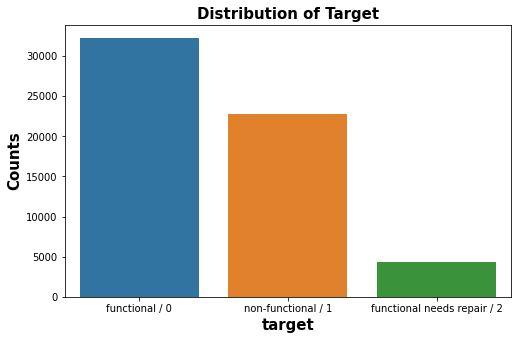

In [81]:
feature_distribution(df_1, col='target',ticklabels=['functional / 0','non-functional / 1','functional needs repair / 2'],figsize=(8,5))

#### Does the district code impact the functionality of the wells?
The below plot shows that districts 1,2,3 4 have the highest number of performing wells.  However, there is also a large number of non-functioning wells.  The plot is helpful because it shows in which districts most of the wells are located.  It would be a good idea to concentrate on the wells in these districts and get the wells functioning.    

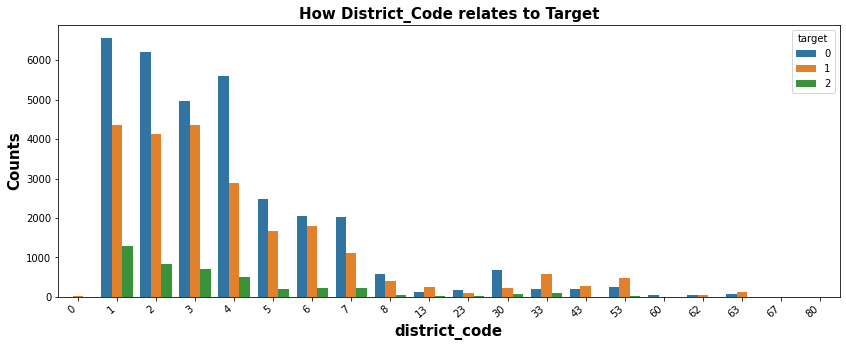

In [82]:
feature_w_hue(df_2, col='district_code', hue_col='target',rot=40,figsize=(14,5))

#### funder
We were looking to see if the top funders give us some indcation of the functionlaity of the wells.  Other is the largest category which isn't helpful because it's not specific. Government Of Tanzania is the next largest group and they have funded 9084 wells.  A little over 4,000 wells are functioning but around 5,000 wells aren't functioning.  The Government of Tanzania isn't very good at funding wells projects that are functional.<br>
I was intrested in how Unicef was responding to the crisis because they are major international relief organization.  UNICEF is one of the top 10 funders.  They provided funding for 1057 wells. Approximately 600 are functioning, 358 are non-functioning and 99 are in need of repairs. <br>
The World Bank another major organization provided funding for 1349 wells - 545 are functioning, 707 are non-functioning and 97 are in need of repairs.  This is helpful to see the extent of certain funders involvement and the status of their projects.  


In [83]:
df_3 = df_2.copy()

In [84]:
df_2['funder'].value_counts(dropna=False).head(20)


other                     12379
Government Of Tanzania     9084
0                          4412
Danida                     3114
Hesawa                     2202
Rwssp                      1374
World Bank                 1349
Kkkt                       1287
World Vision               1246
Unicef                     1057
Tasaf                       877
District Council            843
Dhv                         829
Private Individual          826
Dwsp                        811
Norad                       765
Germany Republi             610
Tcrs                        602
Ministry Of Water           590
Water                       583
Name: funder, dtype: int64

In [85]:
funder_10 = df_3[(df_3['funder'] == 'other') | (df_3["funder"] == 'Government Of Tanzania')
                 |(df_3["funder"] == '0')| (df_3["funder"] == 'Danida')
                 |(df_3["funder"] == 'Hesawa') |(df_3["funder"] == 'Rwssp') 
                 |(df_3["funder"] == 'World Bank') |(df_3["funder"] == 'Kkkt')
                 | (df_3["funder"] == 'World Vision')| (df_3["funder"] == 'Unicef')
                  | (df_3["funder"] == 'Tasaf')]
funder_10.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,target,age,pop_per_year
1,0.0,2013-03-06,other,1399.000000,Other,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,1,GeoData Consultants Ltd,Other,NaN,1,2010.000000,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,3.000000,93.333333
2,25.0,2013-02-25,other,686.000000,World vision,37.460664,-3.821329,Other,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,1,2009.000000,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,0,4.000000,62.500000
3,0.0,2013-01-28,Unicef,263.000000,UNICEF,38.486161,-11.155298,Other,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1,GeoData Consultants Ltd,VWC,NaN,1,1986.000000,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,1,27.000000,2.148148
4,0.0,2011-07-13,other,1018.860839,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,281,1,GeoData Consultants Ltd,Unknown,NaN,1,1996.814686,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,0,14.185314,19.809219
7,0.0,2012-10-09,Rwssp,1018.860839,DWE,32.620617,-4.226198,Other,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,281,1,GeoData Consultants Ltd,Unknown,NaN,1,1996.814686,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,1,15.185314,18.504721


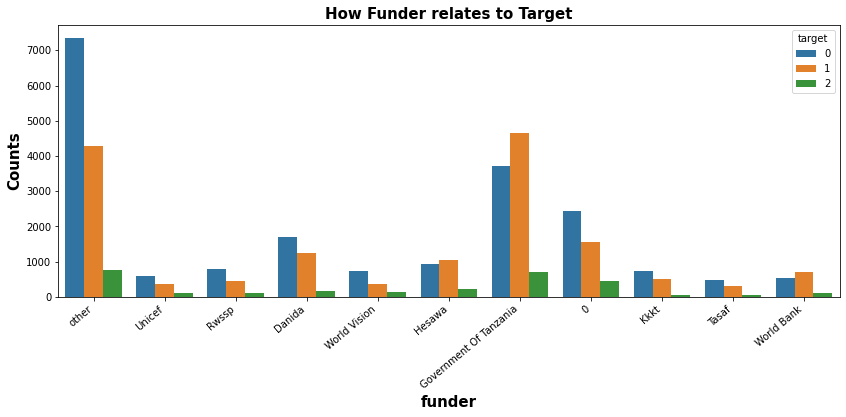

In [86]:
feature_w_hue(funder_10, col='funder', hue_col='target',rot=40,figsize=(14,5))

In [87]:
#df_2.groupby(['funder', 'target']).size()

#### Does location impact functionality of a well
The below plot is really helpful because it shows where the wells are located and their functionality.  In the southeast section there is a cluster of non-functioning wells.  This is helpful information for the government and organizations to get a quick overview of which areas look like they need the most help.  Further research is warranted.  Is there any correlation with district, population?

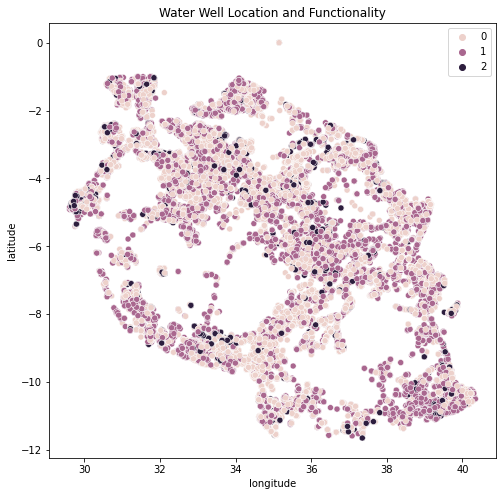

In [88]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='longitude', y='latitude', hue='target', data=df_2)#, ax=ax
plt.title('Water Well Location and Functionality')
plt.legend();

#### Does region_code impact functionality?
It's crucial to see which districts have the highest number of wells and their status.  The plot gives us a quick summary of the number of wells in each district and their status.  Region 11 has highest number of wells with 5300; around 4,200 are functioning, around 1,000 are non-functioning and around 100 are in need of repairs.  Region 17 has the second largest with 5,100 wells; around 3,000 are functioning wells and 1,500 are non-functioning.  In constrast it  shows that regions 8,9,40, 60, 80, 90 and 99 have very few wells and most are non-functioning.

Also, by grouping the features we can see how region and water quality are realted to functionality.  For example, region 8 has among the lowest number of wells and most are non-fucntioning.  We can see that most of the water quality is 'salty' which isn't good.  Whereas, region 11 has the most number of wells and 4120 of the wells have 'good' water quality which as explained below contributes to a functioning well.  

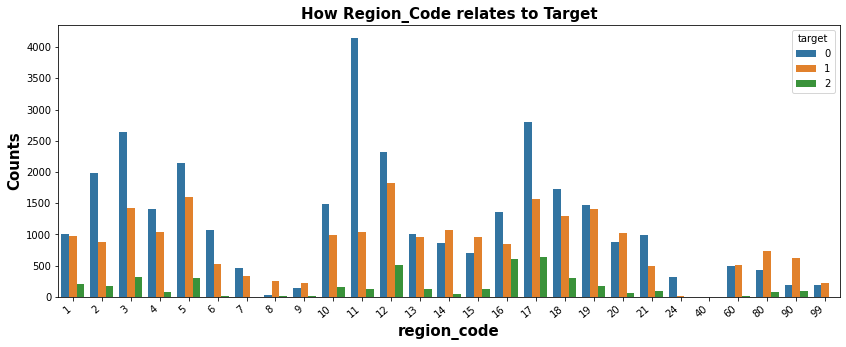

In [89]:
feature_w_hue(df_2, col='region_code', hue_col='target',rot=40,figsize=(14,5))

In [90]:
#pd.set_option('display.max_rows', None)
df_2.groupby(['target', 'region_code','quality_group']).size()

target  region_code  quality_group
0       1            colored           15
                     good             782
                     milky             15
                     salty            197
        2            fluoride         100
                                     ... 
2       80           unknown            3
        90           good              92
                     salty              6
        99           good               5
                     salty              2
Length: 335, dtype: int64

### Does payment type impact functionality?
There largest group is wells for no payment with 25348 wells or 42.67% of the feature. 11379 of the wells are functioning and 12062 are not functioning.  The wells where some payment is required performer better.  For category annually far more wells were functioning (2740), than non-functioning(655) and 247 in need of repair.  Where are monthly fee is required there were 5482 functioning wells, 1891 non-functioing wells and  927 in need of repairs.  

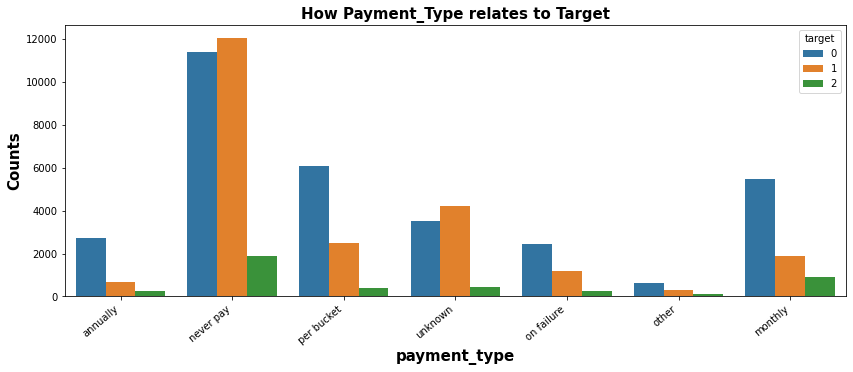

In [91]:
feature_w_hue(df_2, col='payment_type', hue_col='target',rot=40,figsize=(14,5))

In [92]:
df_2.groupby(['target', 'payment_type']).size()

target  payment_type
0       annually         2740
        monthly          5482
        never pay       11379
        on failure       2429
        other             611
        per bucket       6090
        unknown          3528
1       annually          655
        monthly          1891
        never pay       12062
        on failure       1208
        other             325
        per bucket       2486
        unknown          4197
2       annually          247
        monthly           927
        never pay        1907
        on failure        277
        other             118
        per bucket        409
        unknown           432
dtype: int64

### Does the quality of the water impact functionality
The plot shows that there are 6 categories for water quality.  The majority of the wells are in the category of good which constitutes 50,818 of the wells.  Of this category around 28,760 are functioning, 18154 are non-functioning and 18154 in need of repairs.  If the well has 'good water' quality there is a higher chance that it is functioning but there is still a high probability it's not functioning.  If the water quality is salty or unlknown it's probably non-functioning.  This is helpful for organizations to know which wells have good water quality and just need the fucntiong issue addressed and which one require not only the functionig issue but also the water quality issue which is completely different. 

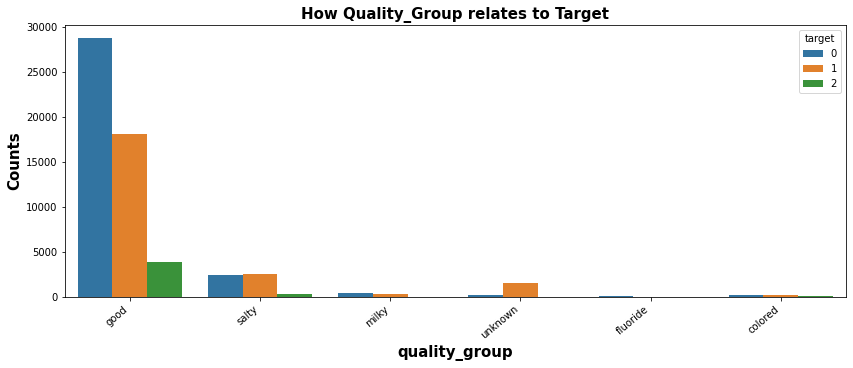

In [93]:
feature_w_hue(df_2, col='quality_group', hue_col='target',rot=40,figsize=(14,5))

In [94]:
df_2.groupby(['target', 'quality_group']).size()

target  quality_group
0       colored            246
        fluoride           157
        good             28760
        milky              438
        salty             2394
        unknown            264
1       colored            190
        fluoride            47
        good             18154
        milky              352
        salty             2504
        unknown           1577
2       colored             54
        fluoride            13
        good              3904
        milky               14
        salty              297
        unknown             35
dtype: int64

#### Does quantity of water impact well functionality?
The below shows there are 5 categories in this feature.  There are 33186	wells in the 'enough' category.  The below plot shows that wells with enough water constitute the largest number of wells and the highest functionality.  There are around 24,000 functioning wells with enough water and around 8,500 are non-functioning.  Based on the below it looks like if the well has a enough water it contributes to the functionality of the well.  The wells need to be tested to make sure they have enough water. 

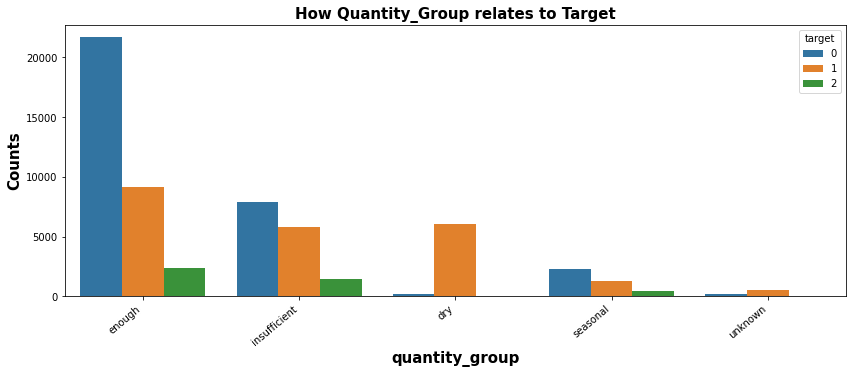

In [95]:
feature_w_hue(df_2, col='quantity_group', hue_col='target',rot=40,figsize=(14,5))

#### Does the source of water impact well functiong?
The plot shows that wells from a stream are the largest group and also have the biggest group of functioning wells.  It still has almost half non-functioing wells.  Shallow wells are the second largest group and they have almost an equal amount of functioning and non-functioning wells.  

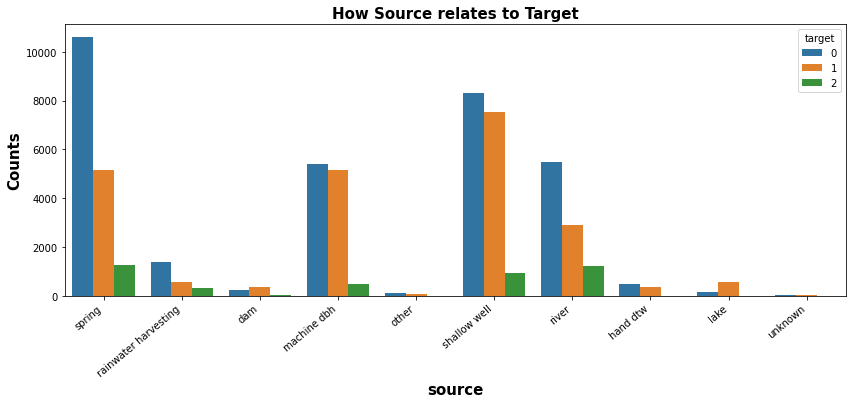

In [133]:
feature_w_hue(df_2, col='source', hue_col='target',rot=40,figsize=(14,5))

### Does the age of the well impact its functionality?
Below is a plot of top 20 largest well age value counts.  The largest group of wells are 14.1 years.  There are 13,343 wells in this age group.  The below plot shows that of this group around 6,700 wells are functioning, 5,500 are not functioning and around 1,200 in need of repair.  The next largest group is 15.1 years.  There are 5,142 wells in this group; around 3,000 are functioning and around 2,100 are functioning.<br>
Does the below plot give us any insights about the relationship between age and the target.  First, aside from years 14 and 15.1 years, we can see that there are more wells that are 1 to 14 yrs old.  Also, more of the wells in these age groups are functioning.  It makes sense because Tanzania was responding to the water crisis so more wells were built in the later
years but there still are a high number of non-functioning wells.

In [96]:
my_sample = df_2.groupby("age").filter(lambda x: len(x) > 800)
my_sample['age'].value_counts()

14.185314    13343
15.185314     5142
3.000000      2740
1.000000      2303
16.185314     2210
2.000000      2129
5.000000      1980
4.000000      1890
13.000000     1869
7.000000      1404
6.000000      1381
11.000000     1352
8.000000      1160
14.000000     1160
33.000000     1120
15.000000      993
23.000000      905
10.000000      868
16.000000      826
9.000000       814
Name: age, dtype: int64

In [97]:
my_sample['age'].describe()

count    45589.000000
mean        11.407644
std          6.314462
min          1.000000
25%          6.000000
50%         14.185314
75%         14.185314
max         33.000000
Name: age, dtype: float64

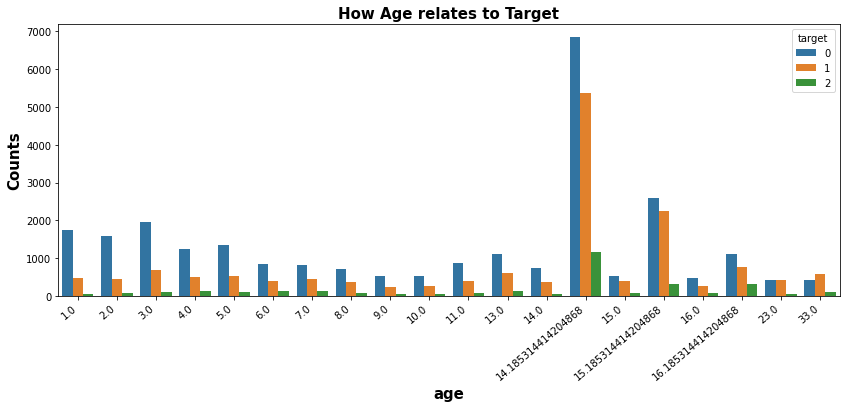

In [98]:
feature_w_hue(my_sample, col='age', hue_col='target',rot=40,figsize=(14,5))

### Pre-processing of Data
The pre-processing of the data will involve One-Hot Encoding the features with object data types because
non-numeric values can't be inputted into the models.  In addition, this is a ternary classification problem because the target has three classifiction values: functional, non functional and functional needs repair. As displayed above we can see that value_counts are not balanced.  This could impact the accuracy of the model's performance.  I  ran the SMOTE method the training set to resample the set and get equal values for each category. 

In [99]:
cols_obj = ['funder','installer','wpt_name','basin','lga','scheme_management','extraction_type_class','management','payment','quality_group',
            'quantity_group','source','waterpoint_type']
cols_num = ['gps_height','latitude','longitude','district_code','region_code','permit','construction_year','population','age','pop_per_year']

df_3 = df_2[cols_obj]
df_4 = df_2[cols_num]

In [100]:
df_3.head()

,funder,installer,wpt_name,basin,lga,scheme_management,extraction_type_class,management,payment,quality_group,quantity_group,source,waterpoint_type
0,Roman,Other,Unknown,Lake Nyasa,Ludewa,VWC,gravity,vwc,pay annually,good,enough,spring,communal standpipe
1,other,Other,Zahanati,Lake Victoria,Serengeti,Other,gravity,wug,never pay,good,insufficient,rainwater harvesting,communal standpipe
2,other,World vision,Other,Pangani,Simanjiro,VWC,gravity,vwc,pay per bucket,good,enough,dam,communal standpipe multiple
3,Unicef,UNICEF,Other,Ruvuma / Southern Coast,Nanyumbu,VWC,submersible,vwc,never pay,good,dry,machine dbh,communal standpipe multiple
4,other,Artisan,Shuleni,Lake Victoria,Karagwe,Unknown,gravity,other,never pay,good,seasonal,rainwater harvesting,communal standpipe


In [101]:
df_4.head()

,gps_height,latitude,longitude,district_code,region_code,permit,construction_year,population,age,pop_per_year
0,1390.000000,-9.856322,34.938093,5,11,0,1999.000000,109,12.000000,9.083333
1,1399.000000,-2.147466,34.698766,2,20,1,2010.000000,280,3.000000,93.333333
2,686.000000,-3.821329,37.460664,4,21,1,2009.000000,250,4.000000,62.500000
3,263.000000,-11.155298,38.486161,63,90,1,1986.000000,58,27.000000,2.148148
4,1018.860839,-1.825359,31.130847,1,18,1,1996.814686,281,14.185314,19.809219


#### One-Hot Encoding

In [102]:
one_hot_df = pd.get_dummies(df_3, cols_obj, drop_first=True)

In [103]:
one_hot_df.head()

,funder_Adb,funder_Adra,funder_African,funder_Amref,funder_Anglican Church,funder_Bsf,funder_Ces (gmbh),funder_Ces(gmbh),funder_Co,funder_Community,funder_Concern,funder_Concern World Wide,funder_Danida,funder_Ded,funder_Dfid,funder_Dh,funder_Dhv,funder_District Council,funder_Dmdd,funder_Dwe,funder_Dwsp,funder_Fini Water,funder_Finw,funder_Fw,funder_Germany,funder_Germany Republi,funder_Go,funder_Government Of Tanzania,funder_Halmashauri Ya Wilaya Sikonge,funder_He,funder_Hesawa,funder_Hifab,funder_Hsw,funder_Ir,funder_Is,funder_Isf,funder_Jaica,funder_Jica,funder_Ki,funder_Kiliwater,funder_Kkkt,funder_Kkkt_makwale,funder_Lamp,funder_Lawatefuka Water Supply,funder_Lga,funder_Lvia,funder_Magadini-makiwaru Water,funder_Ministry Of Water,funder_Mission,funder_Mkinga Distric Coun,funder_Muwsa,funder_Nethalan,funder_Netherlands,funder_No,funder_Norad,funder_Oikos E.Afrika,funder_Oxfam,funder_Oxfarm,funder_Plan Int,funder_Private,funder_Private Individual,funder_Rc,funder_Rc Church,funder_Roman,funder_Roman Catholic,funder_Ru,funder_Rudep,funder_Rural Water Supply And Sanitat,funder_Rwssp,funder_Shipo,funder_Snv,funder_Swedish,funder_Tardo,funder_Tasaf,funder_Tassaf,funder_Tcrs,funder_Unhcr,funder_Unice,funder_Unicef,funder_Village Council,funder_Villagers,funder_W.B,funder_Wananchi,funder_Water,funder_Wateraid,funder_World Bank,funder_World Vision,funder_Wsdp,funder_Wua,funder_Wvt,funder_other,installer_ACRA,installer_AMREF,installer_Amref,installer_Artisan,installer_CES,installer_Centr,installer_Central Government,installer_Central government,installer_Central govt,installer_Commu,installer_Community,installer_Consulting Engineer,installer_DANID,installer_DANIDA,installer_DDCA,installer_DED,installer_DH,installer_DW,installer_DWE,installer_DWSP,installer_Da,installer_Distri,installer_District Council,installer_District council,installer_Dmdd,installer_FINI WATER,installer_FW,installer_FinW,installer_Fini Water,installer_Fini water,installer_GOVER,installer_Gove,installer_Gover,installer_Government,installer_HE,installer_HESAWA,installer_HSW,installer_Halmashauri ya wilaya sikonge,installer_Handeni Trunk Main(,installer_Hesawa,installer_ISF,installer_Idara ya maji,installer_Ir,installer_Is,installer_JAICA,installer_JICA,installer_KKKT,installer_KKKT _ Konde and DWE,installer_Kiliwater,installer_Kuwait,installer_LGA,installer_Lawatefuka water sup,installer_MUWSA,installer_MWE,installer_Magadini-Makiwaru wa,installer_Mission,installer_NORAD,installer_Norad,installer_OXFAM,installer_Other,installer_Private,installer_RC,installer_RC CHURCH,installer_RWE,installer_RWSSP,installer_SEMA,installer_SHIPO,installer_Sengerema Water Department,installer_TASAF,installer_TCRS,installer_TWE,installer_TWESA,installer_Tardo,installer_UNICEF,installer_Unknown,installer_Villagers,installer_WATER AID,installer_WEDECO,installer_WU,installer_WVT,installer_Wizara ya maji,installer_World,installer_World Vision,installer_World vision,installer_wananchi,wpt_name_Kanisani,wpt_name_Madukani,wpt_name_Mkombozi,wpt_name_Msikitini,wpt_name_Muungano,wpt_name_Ofisini,wpt_name_Other,wpt_name_School,wpt_name_Sekondari,wpt_name_Shule,wpt_name_Shule Ya Msingi,wpt_name_Shuleni,wpt_name_Sokoni,wpt_name_Unknown,wpt_name_Zahanati,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_M

In [104]:
one_hot_df.shape

(59400, 373)

In [105]:
result = pd.concat([df_4, one_hot_df], axis=1)
result.head()

,gps_height,latitude,longitude,district_code,region_code,permit,construction_year,population,age,pop_per_year,funder_Adb,funder_Adra,funder_African,funder_Amref,funder_Anglican Church,funder_Bsf,funder_Ces (gmbh),funder_Ces(gmbh),funder_Co,funder_Community,funder_Concern,funder_Concern World Wide,funder_Danida,funder_Ded,funder_Dfid,funder_Dh,funder_Dhv,funder_District Council,funder_Dmdd,funder_Dwe,funder_Dwsp,funder_Fini Water,funder_Finw,funder_Fw,funder_Germany,funder_Germany Republi,funder_Go,funder_Government Of Tanzania,funder_Halmashauri Ya Wilaya Sikonge,funder_He,funder_Hesawa,funder_Hifab,funder_Hsw,funder_Ir,funder_Is,funder_Isf,funder_Jaica,funder_Jica,funder_Ki,funder_Kiliwater,funder_Kkkt,funder_Kkkt_makwale,funder_Lamp,funder_Lawatefuka Water Supply,funder_Lga,funder_Lvia,funder_Magadini-makiwaru Water,funder_Ministry Of Water,funder_Mission,funder_Mkinga Distric Coun,funder_Muwsa,funder_Nethalan,funder_Netherlands,funder_No,funder_Norad,funder_Oikos E.Afrika,funder_Oxfam,funder_Oxfarm,funder_Plan Int,funder_Private,funder_Private Individual,funder_Rc,funder_Rc Church,funder_Roman,funder_Roman Catholic,funder_Ru,funder_Rudep,funder_Rural Water Supply And Sanitat,funder_Rwssp,funder_Shipo,funder_Snv,funder_Swedish,funder_Tardo,funder_Tasaf,funder_Tassaf,funder_Tcrs,funder_Unhcr,funder_Unice,funder_Unicef,funder_Village Council,funder_Villagers,funder_W.B,funder_Wananchi,funder_Water,funder_Wateraid,funder_World Bank,funder_World Vision,funder_Wsdp,funder_Wua,funder_Wvt,funder_other,installer_ACRA,installer_AMREF,installer_Amref,installer_Artisan,installer_CES,installer_Centr,installer_Central Government,installer_Central government,installer_Central govt,installer_Commu,installer_Community,installer_Consulting Engineer,installer_DANID,installer_DANIDA,installer_DDCA,installer_DED,installer_DH,installer_DW,installer_DWE,installer_DWSP,installer_Da,installer_Distri,installer_District Council,installer_District council,installer_Dmdd,installer_FINI WATER,installer_FW,installer_FinW,installer_Fini Water,installer_Fini water,installer_GOVER,installer_Gove,installer_Gover,installer_Government,installer_HE,installer_HESAWA,installer_HSW,installer_Halmashauri ya wilaya sikonge,installer_Handeni Trunk Main(,installer_Hesawa,installer_ISF,installer_Idara ya maji,installer_Ir,installer_Is,installer_JAICA,installer_JICA,installer_KKKT,installer_KKKT _ Konde and DWE,installer_Kiliwater,installer_Kuwait,installer_LGA,installer_Lawatefuka water sup,installer_MUWSA,installer_MWE,installer_Magadini-Makiwaru wa,installer_Mission,installer_NORAD,installer_Norad,installer_OXFAM,installer_Other,installer_Private,installer_RC,installer_RC CHURCH,installer_RWE,installer_RWSSP,installer_SEMA,installer_SHIPO,installer_Sengerema Water Department,installer_TASAF,installer_TCRS,installer_TWE,installer_TWESA,installer_Tardo,installer_UNICEF,installer_Unknown,installer_Villagers,installer_WATER AID,installer_WEDECO,installer_WU,installer_WVT,installer_Wizara ya maji,installer_World,installer_World Vision,installer_World vision,installer_wananchi,wpt_name_Kanisani,wpt_name_Madukani,wpt_name_Mkombozi,wpt_name_Msikitini,wpt_name_Muungano,wpt_name_Ofisini,wpt_name_Other,wpt_name_School,wpt_name_Sekondari,wpt_name_Shule,wpt_name_Shule Ya Msingi,wpt_name_Shuleni,wpt_name_Sokoni,wpt_name_Unknown,wpt_name_Zahanati,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,

In [106]:
result.shape

(59400, 383)

In [107]:
 from sklearn.model_selection import train_test_split

In [108]:
X = result.copy()
y = df_2['target']

In [109]:
from imblearn.over_sampling import SMOTE

#### Train/Test Split 

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [111]:
from sklearn.preprocessing import MinMaxScaler

#### SMOTE

In [112]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_sample(X_train, y_train)

In [113]:
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test.shape)
print(y_test.shape)

(77406, 383)
(77406,)
(11880, 383)
(11880,)


In [114]:
y_test.value_counts()

0    6457
1    4572
2     851
Name: target, dtype: int64

## Modeling
Created KNearest Neighbors and Random Forest models.  Used the method GridSearchCV for hyperparameter optimization.

In [115]:
def eval_classification_model(X_train_resampled, X_test, y_train_resampled, y_pred,
                              normalize='true',cmap='Blues',figsize=[10,5]):
      
    # Classification Report / Accuracy Score 
    print(dashes)
    print("Classification Report")
    print(dashes)
    classes = ['0/Functional','1/Non-functioning','2/Needs Repair']
    print(metrics.classification_report(y_test,y_pred,target_names=classes))  
    print(dashes)
    print('\n')
   
    plt.figure(figsize=(8,8))
    rf_cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(rf_cm, annot=True, fmt="d", cmap='Blues')    

In [116]:
# knn = KNeighborsClassifier(n_neighbors=30)
# model = knn.fit(X_train_resampled, y_train_resampled)
# y_pred =model.predict(X_test)

In [117]:
# accuracy_score(y_test, y_pred)

In [118]:
# rf = RandomForestClassifier(random_state=123, n_estimators=400,class_weight='balanced',
#                            max_depth = 90,max_features = 'auto', criterion ='entropy')
# model_rf = rf.fit(X_train_resampled, y_train_resampled)
# y_pred =model_rf.predict(X_test)
# print(accuracy_score(y_test, y_pred))

In [119]:
# model = eval_classification_model(X_train_resampled, X_test, 
#                  y_train_resampled, y_pred)

In [120]:
# plt.figure(figsize=(10,12))
# plt.title('Feature Importances')
# feat_importances = pd.Series(model_rf.feature_importances_, index=result.columns)
# ax = feat_importances.nlargest(20).plot(kind='barh')
# ax.invert_yaxis()

In [121]:
# xgb = xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, probability=True)
# model_xgb = xgb.fit(X_train_resampled, y_train_resampled)
# y_pred_xgb=model_xgb.predict(X_test)

In [122]:
# model = eval_classification_model(X_train_resampled, X_test, 
#                  y_train_resampled, y_pred_xgb)

In [123]:
print('This WORKS!! Use it!!')

This WORKS!! Use it!!


In [124]:
model_dict = {
    'KNN': { 'model' : KNeighborsClassifier(),
                         'params' : { 
                                        "n_neighbors" : [15,19],#3,5,7,9,11,13,15
                                        "weights" : ['uniform', 'distance']}
             },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
             'bootstrap': [True],
            'max_features': ['auto', 'sqrt'],
            'min_samples_split': [5, 10],
            'n_estimators': [400],#[100, 200, 300,500]
             'class_weight':['balanced'],
              'criterion' :['gini', 'entropy']
             }
             },

#               'XGBoost': { 'model' : xgb.XGBClassifier(use_label_encoder=False, verbosity = 0, probability=True),
#                              'params' : { 
                                          
#                                         'max_depth': [2,3,4], 
#                                         'n_estimators': [100],
#                                         'learning_rate' :[0.01,0.05,0.1]
#                                              }}
              
              
              }

In [125]:
scores = []
for model_name, mp in model_dict.items():
     clf = GridSearchCV(mp['model'], mp['params'],cv=5,  return_train_score=False) #refit='f1_weighted',
     clf.fit(X_train, y_train)
     y_pred = clf.predict(X_test) 
    
     accuracy = accuracy_score(y_test, y_pred)

     scores.append({
      'model':model_name,
      'accuracy': accuracy,

      'best params': clf.best_params_
      })
pd.set_option('display.max_colwidth', None)    
gscv_models = pd.DataFrame(scores) 
gscv_models

,model,accuracy,best params
0,KNN,0.701936,"{'n_neighbors': 19, 'weights': 'distance'}"
1,random_forest,0.792593,"{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 400}"


In [126]:
rf_params = gscv_models.iloc[1]['best params']
rf = RandomForestClassifier(**rf_params)
model_rf = rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf=model_rf.predict(X_test)

What does the Classfication Report tells about the model?   The overall performance of the model using accuracy as the metric is 79%.<br>
Precision is  the ratio between the True Positives and all the Positives. For our problem statement, that would be the measure of wells that were correctly predicted  as functioning out of all the wells that are actually functioning.  When the model predicts that the well is functioning, it is correct around 82% of the time.  An organization does’t want to start spending time and money on repairing a well because the model predicted it as non-functioning when in fact it's actually functioning. 

What does the Confusion Matrix tell us about the model in making predictions on the test set?  We are interested in wells that are 
functioning.  In the test set there are 6457 values for functioning wells.  The model was correct in predicting that 5432 wells 
were functional.  If we're looking for false positives, 834 were falsey predicted as functional when in fact they were non-functioning.  The model falsely 
predicted that 348 were functional when there were functional but needed repairs.  On the other hand if the well was functioning
the model falsely predicted 658 times that it was not functioning.  When the well was non-functioning it correctly predicted
3587 times that the wells were non-functioning.  It made 131 incorrect predictions that well was functioning but in 
need of repairs when in fact it was non-functioning. 


------------------------------------------------------------
Classification Report
------------------------------------------------------------
                   precision    recall  f1-score   support

     0/Functional       0.82      0.84      0.83      6457
1/Non-functioning       0.82      0.78      0.80      4572
   2/Needs Repair       0.42      0.43      0.42       851

         accuracy                           0.79     11880
        macro avg       0.68      0.69      0.68     11880
     weighted avg       0.79      0.79      0.79     11880

------------------------------------------------------------




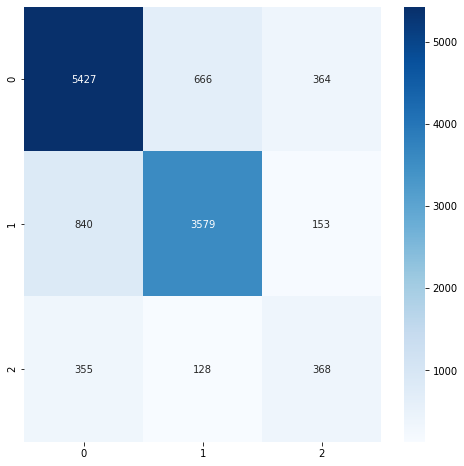

In [127]:
model = eval_classification_model(X_train_resampled, X_test, 
                 y_train_resampled, y_pred_rf)

#### Feature Importance 
Feature Importance is a technique that higlights the relative importance of feature when making a prediction.  
The below plot shows the top 20 features according to importance.  The features longitude, latitude and gps_height were important and had an impact on the model in making making predictions as opposed to payment_pay_per_bucket and payment_unknown had less importance on the model in making predictions.

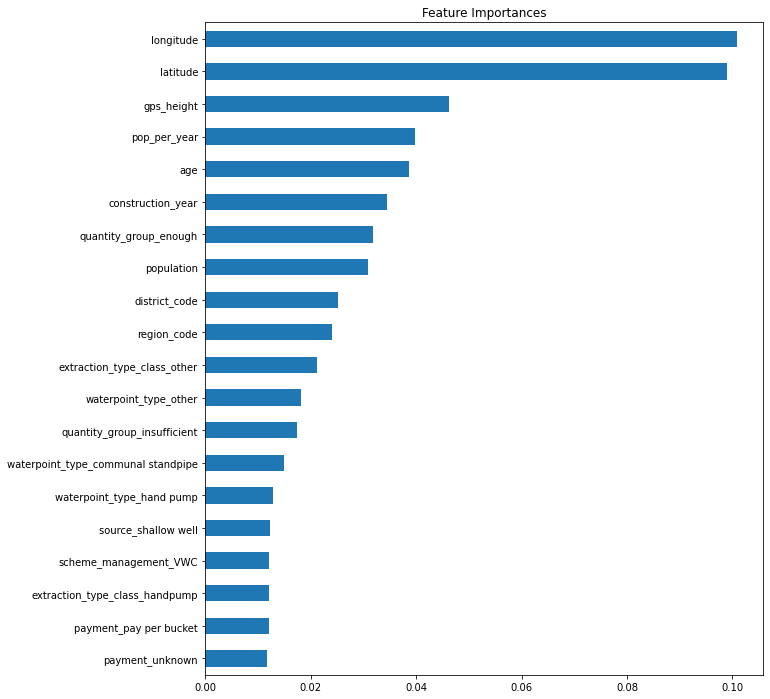

In [128]:
plt.figure(figsize=(10,12))
plt.title('Feature Importance of Top 20 Features')
feat_importances = pd.Series(model_rf.feature_importances_, index=result.columns)
ax = feat_importances.nlargest(20).plot(kind='barh')
ax.invert_yaxis()

### Findings

1.  The RandomForestClassifier was the highest performing model with an accuracy of 79%.
2.  In EDA we explored the relationship between important features and the target.  Regarding payment, it appears that whether payment is required to use well does it does impact functionality.  The largest group of wells is no payment where 11379 of the wells are functioning and 12062 are not functioning. The wells where some payment is required function better. For category 'annually' far more wells were functioning (2740), than non-functioning(655) and 247 in need of repair. Where a 'monthly fee' is required there were 5482 functioning wells, 1891 non-functioing wells and 927 in need of repairs.
<br>
3.  Water quality does impact functionality of well.  If the water quality is good there is a higher probability that well is functioning.  However, even if water quality is good there still a good chance it's non-functioning.  Water quality of good is by far the largest group of wells and constitutes 50,818 of the wells.  Of this category around 28,760 are functioning, 18154 are non-functioning and 18154 in need of repairs.  Water quality is a good status check so governments and organizations know whether they have to deal with just functionality status and/or water quality.<br>
4.  Age of well does impact functioning of the well. Most were built within the last 16 years and the majority within these years were functioning but still a high number not functioning.<br>
5.  Longitude and latitude were the feature that had the most importance on the model in making predictions.